In [25]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("shantanudhakadd/email-spam-detection-dataset-classification")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\BineshMahato\.cache\kagglehub\datasets\shantanudhakadd\email-spam-detection-dataset-classification\versions\1


In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import re


In [27]:
import pandas as pd
import re

# Load the dataset
file_path = r'C:\Users\BineshMahato\.cache\kagglehub\datasets\shantanudhakadd\email-spam-detection-dataset-classification\versions\1\spam.csv'
df = pd.read_csv(file_path, encoding='latin-1')

# Check for missing values
print(df.isnull().sum())  # To check if there are any missing values

# We are only interested in 'v1' and 'v2' columns (label and text)
df = df[['v1', 'v2']]  # Select only 'v1' (label) and 'v2' (text) columns
df.columns = ['label', 'text']  # Rename columns to 'label' and 'text'

# Remove special characters and digits using regex
def clean_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Keep only alphabets and spaces
    text = text.lower()  # Convert to lowercase
    return text

# Apply the clean_text function to the 'text' column
df['cleaned_text'] = df['text'].apply(clean_text)

# Display the cleaned data
print(df.head())


v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64
  label                                               text  \
0   ham  Go until jurong point, crazy.. Available only ...   
1   ham                      Ok lar... Joking wif u oni...   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...   
3   ham  U dun say so early hor... U c already then say...   
4   ham  Nah I don't think he goes to usf, he lives aro...   

                                        cleaned_text  
0  go until jurong point crazy available only in ...  
1                            ok lar joking wif u oni  
2  free entry in  a wkly comp to win fa cup final...  
3        u dun say so early hor u c already then say  
4  nah i dont think he goes to usf he lives aroun...  


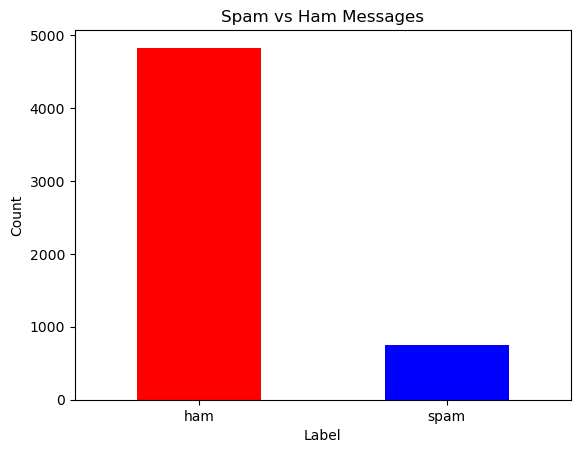

In [28]:
import matplotlib.pyplot as plt

# Count the occurrences of each label
label_counts = df['label'].value_counts()

# Plot the distribution
label_counts.plot(kind='bar', color=['red', 'blue'])
plt.title('Spam vs Ham Messages')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


In [29]:
import seaborn as sns
print(sns.__version__)


0.13.2


In [30]:
from sklearn.model_selection import train_test_split

# Split the data into features (X) and labels (y)
X = df['cleaned_text']
y = df['label']

# Split into train (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the datasets
print(f"Training data shape: {X_train.shape}, Test data shape: {X_test.shape}")


Training data shape: (4457,), Test data shape: (1115,)


In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF vectorizer
vectorizer = TfidfVectorizer(stop_words='english')

# Fit the vectorizer on the training data and transform both the training and test data
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Check the shape of the transformed data
print(f"Training data after TF-IDF: {X_train_tfidf.shape}")
print(f"Test data after TF-IDF: {X_test_tfidf.shape}")


Training data after TF-IDF: (4457, 7259)
Test data after TF-IDF: (1115, 7259)


In [32]:
from sklearn.naive_bayes import MultinomialNB

# Initialize the Naive Bayes classifier
nb_model = MultinomialNB()

# Train the model on the training data
nb_model.fit(X_train_tfidf, y_train)


MultinomialNB()

Accuracy: 96.86%
              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       965
        spam       1.00      0.77      0.87       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.93      1115
weighted avg       0.97      0.97      0.97      1115



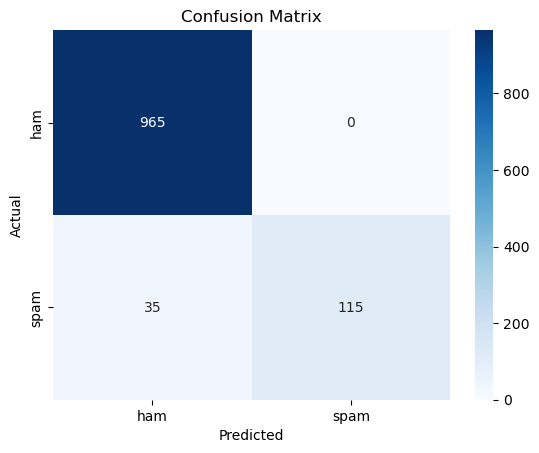

In [34]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict the labels for the test data
y_pred = nb_model.predict(X_test_tfidf)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Display the classification report
print(classification_report(y_test, y_pred))

# Display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues', xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [35]:
# Example text to predict
new_message = ["Free money!!!", "Hey, how are you doing today?"]

# Clean the new message
new_message_cleaned = [clean_text(msg) for msg in new_message]

# Vectorize the new message
new_message_tfidf = vectorizer.transform(new_message_cleaned)

# Predict the label for the new message
prediction = nb_model.predict(new_message_tfidf)
print(prediction)


['ham' 'ham']
